# <font color='red'>SGD Algorithm to predict movie ratings</font>

**There will be some functions that start with the word "grader" ex: grader_matrix(), grader_mean(), grader_dim() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

<pre>
1. Download the data from <a href='https://drive.google.com/open?id=1-1z7iDB52cB6_JpO7Dqa-eOYSs-mivpq'> here </a>
2. The data will be of this format, each data point is represented as a triplet of user_id, movie_id and rating 
<table>
<tr><th>user_id</th><th>movie_id</th><th>rating</th></tr>
<tr><td>77</td><td>236</td><td>3</td></tr>
<tr><td>471</td><td>208</td><td>5</td></tr>
<tr><td>641</td><td>401</td><td>4</td></tr>
<tr><td>31</td><td>298</td><td>4</td></tr>
<tr><td>58</td><td>504</td><td>5</td></tr>
<tr><td>235</td><td>727</td><td>5</td></tr>
</table>

## <font color='red'>Task 1</font>

<font color='red'><b>Predict the rating for a given (user_id, movie_id) pair </b> </font>


Predicted rating $\hat{y}_{ij}$ for user i, movied j pair is calcuated as $\hat{y}_{ij} = \mu + b_i + c_j + u_i^T v_j$ , here we will be finding the best values of $b_{i}$ and $c_{j}$ using SGD algorithm with the optimization problem for N users and M movies is defined as

$$
L = \min_{ b, c, \{ u_i \}_{i=1}^N, \{ v_j \}_{j=1}^M}
\quad
\alpha \Big(
    \sum_{j} \sum_{k} v_{jk}^2 
    + \sum_{i} \sum_{k} u_{ik}^2 
    + \sum_{i} b_i^2
    + \sum_{j} c_i^2
    \Big)
+ \sum_{i,j \in \mathcal{I}^{\text{train}}}
    (y_{ij} - \mu - b_i - c_j - u_i^T v_j)^2
$$

<ul>
<li><span class="math">\(\mu\)</span> : scalar mean rating</li>
<li><span class="math">\(b_i\)</span> : scalar bias term for user <span class="math">\(i\)</span></li>
<li><span class="math">\(c_j\)</span> : scalar bias term for movie <span class="math">\(j\)</span></li>
<li><span class="math">\(u_i\)</span> : K-dimensional vector for user <span class="math">\(i\)</span></li>
<li><span class="math">\(v_j\)</span> : K-dimensional vector for movie <span class="math">\(j\)</span></li>
</ul>

 $ \ $





*.  We will be giving you some functions, please write code in that functions only.

*.  After every function, we will be giving you expected output, please make sure that you get that output. 





1. Construct adjacency matrix with the given data, assuming its graph and the weight of each edge is the rating given by user to the movie

<img src='https://i.imgur.com/rmUCGMb.jpg' width=200>

   you can construct this matrix like $A[i][j]=r_{ij}$ here $i$ is user_id, $j$ is movie_id and $r_{ij}$ is rating given by user $i$ to the movie $j$

   Hint : you can create adjacency matrix using <a href='https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html'> csr_matrix</a>

2. We will Apply SVD decomposition on the Adjaceny matrix <a href='https://stackoverflow.com/a/31528944/4084039'>link1</a>, <a href='https://machinelearningmastery.com/singular-value-decomposition-for-machine-learning/'> link2</a> and get three matrices $U, \sum, V$ such that $U \times \sum \times V^T = A$, <br> 
if $A$ is of dimensions $N \times M$ then <br>
U is of $N \times k$, <br>
$\sum$ is of $k \times k$ and <br>
$V$ is $M \times k$ dimensions. <br>

   *.  So the matrix $U$ can be represented as matrix representation of users, where each row $u_{i}$ represents a k-dimensional vector for a user

   *. So the matrix $V$ can be represented as matrix representation of movies, where each row $v_{j}$ represents a k-dimensional vector for a movie.
3. Compute $\mu$ , $\mu$  represents the mean of all the rating given in the dataset.(write your code in <font color='blue'>def m_u()</font>)
4. For each unique user initilize a bias value $B_{i}$ to zero, so if we have $N$ users $B$ will be a $N$ dimensional vector, the $i^{th}$ value of the $B$ will corresponds to the bias term for $i^{th}$ user (write your code in <font color='blue'>def initialize()</font>)

5. For each unique movie initilize a bias value $C_{j}$ zero, so if we have $M$ movies $C$ will be a $M$ dimensional vector, the $j^{th}$ value of the $C$ will corresponds to the bias term for $j^{th}$ movie (write your code in <font color='blue'>def initialize()</font>)

6. Compute dL/db_i (Write you code in <font color='blue'> def derivative_db()</font>)
7. Compute dL/dc_j(write your code in <font color='blue'> def derivative_dc()</font>

8. Print the mean squared error with predicted ratings.

<pre>
for each epoch:
    for each pair of (user, movie):
        b_i =  b_i - learning_rate * dL/db_i
        c_j =  c_j - learning_rate * dL/dc_j
predict the ratings with formula
</pre>
$\hat{y}_{ij} = \mu + b_i + c_j + \text{dot_product}(u_i , v_j) $

9. you can choose any learning rate and regularization term in the range $10^{-3}  \text{ to } 10^2$  <br>
  
10. __bonus__: instead of using SVD decomposition you can learn the vectors $u_i$, $v_j$ with the help of SGD algo similar to $b_i$ and $c_j$ 

<br>

 # <font color='red'>Task 2 </font>

As we know U is the learned matrix of user vectors, with its i-th row as the vector ui for user i. Each row of U can be seen as a "feature vector" for a particular user.

The question we'd like to investigate is this: do our computed per-user features that are optimized for predicting movie ratings contain anything to do with gender?

The provided data file <a href='https://drive.google.com/open?id=1PHFdJh_4gIPiLH5Q4UErH8GK71hTrzlY'>user_info.csv</a> contains an is_male column indicating which users in the dataset are male. Can you predict this signal given the features U?


> __Note 1__ : there is no train test split in the data, the goal of this assignment is to give an intution about how to do matrix factorization with the help of SGD and application of truncated SVD. for better understanding of the collabarative fillerting please check netflix case study. <br><br>
> __Note 2__ : Check if scaling of $U$, $V$ matrices improve the metric 

<br>


<br>

<font color='red'> Reading the csv file </font>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
path_dir = '/content/drive/MyDrive/Colab Notebooks/AAIC_Assignments/solving/15_RecommendationSystem_Truncated SVD SGD algorithm to predict ratings/ratings_train.csv'
# data=pd.read_csv('ratings_train.cs)
data=pd.read_csv(path_dir)
data.head()

,user_id,item_id,rating
0,772,36,3
1,471,228,5
2,641,401,4
3,312,98,4
4,58,504,5


In [6]:
data.shape

(89992, 3)

<font color='red'>Create your adjacency matrix </font>

In [55]:
user_i=data['user_id']
movie_j=data['item_id']
#converting dtype: pandas --> list
rating=data['rating'].values.tolist()
user_info= user_i.values.tolist()
movie_info= movie_j.values.tolist()


In [56]:
from scipy.sparse import csr_matrix
user_i=data['user_id']
user_i=data['item_id']
# write your code of adjacency matrix here
adjacency_matrix = csr_matrix((rating,(user_info, movie_info))).toarray() 

In [57]:
adjacency_matrix.shape

(943, 1681)

<font color='cyan'>Grader function - 1</font>

In [58]:
def grader_matrix(matrix):
  assert(matrix.shape==(943,1681))
  return True
grader_matrix(adjacency_matrix)

True

**The unique items in the given csv file are 1662 only . But the id's vary from 0-1681 but they are not continuous and hence 
you'll get matrix of size 943x1681.**

<font color='red'> SVD decompostion</font>

Sample code for SVD decompostion

In [13]:
from sklearn.utils.extmath import randomized_svd
import numpy as np 
matrix = np.random.random((20, 10))
U, Sigma, VT = randomized_svd(matrix, n_components=5,n_iter=5, random_state=None)
print(U.shape)
print(Sigma.shape)
print(VT.T.shape)

(20, 5)
(5,)
(10, 5)


<font color='red'>Write your code for SVD decompostion</font>

In [61]:
# Please use adjacency_matrix as matrix for SVD decompostion
# You can choose n_components as your choice
U, Sigma, VT = randomized_svd(adjacency_matrix, n_components=5,n_iter=5, random_state=None)
print('-'*45)
print('Shape of Left Singular vectors: ',U.shape)
print('Shape of Diagonal of Singular values: ',Sigma.shape)
print('Shape of Right Singular vectors: ',VT.T.shape)
print('-'*45)

---------------------------------------------
Shape of Left Singular vectors:  (943, 5)
Shape of Diagonal of Singular values:  (5,)
Shape of Right Singular vectors:  (1681, 5)
---------------------------------------------


<font color='red'>Compute mean of ratings</font>

In [62]:
def m_u(ratings):
    '''In this function, we will compute mean for all the ratings'''
    # you can use mean() function to do this
    # check this (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html) link for more details.
    res_mean = np.mean(ratings)

    return res_mean

In [63]:
mu=m_u(data['rating'])
print(mu)

3.529480398257623


<font color='cyan'>Grader function -2 </font>

In [18]:
def grader_mean(mu):
  assert(np.round(mu,3)==3.529)
  return True
mu=m_u(data['rating'])
grader_mean(mu)

True

<font color='red'>Initialize $B_{i}$ and $C_{j}$

Hint : Number of rows of adjacent matrix corresponds to user dimensions($B_{i}$), number of columns of adjacent matrix corresponds to movie dimensions ($C_{j}$)

In [64]:
def initialize(dim):
    '''In this function, we will initialize bias value 'B' and 'C'.'''
    # initalize the value to zeros 
    # return output as a list of zeros 
    init_zero = np.zeros(dim)
    

    return init_zero

In [70]:
# adjacency_matrix.shape, len(adjacency_matrix), adjacency_matrix.shape[0], adjacency_matrix.shape[1]

((943, 1681), 943, 943, 1681)

In [71]:
# give the number of dimensions for b_i (Here b_i corresponds to users)
dim= adjacency_matrix.shape[0]
b_i=initialize(dim)

In [72]:
# give the number of dimensions for c_j (Here c_j corresponds to movies)
dim= adjacency_matrix.shape[1]
c_j=initialize(dim)

<font color='cyan'>Grader function -3 </font>

In [23]:
def grader_dim(b_i,c_j):
  assert(len(b_i)==943 and np.sum(b_i)==0)
  assert(len(c_j)==1681 and np.sum(c_j)==0)
  return True
grader_dim(b_i,c_j)

True

<font color='red'>Compute dL/db_i</font>

In [77]:
def derivative_db(user_id,item_id,rating,U,V,mu,alpha):
    '''In this function, we will compute dL/db_i'''
    #derivate term of Regularizer-term
    reg_b = alpha * 2*b_i[user_id]
    #derivate term of Loss-term
    loss_b = 2*(rating-mu-b_i[user_id]-c_j[item_id]-np.dot(U[user_id],np.transpose(V)[item_id]))

    dL_db_i = reg_b - loss_b
    return dL_db_i


<font color='cyan'>Grader function -4 </font>

In [78]:
def grader_db(value):
    assert(np.round(value,3)==-0.931)
    return True
U1, Sigma, V1 = randomized_svd(adjacency_matrix, n_components=2,n_iter=5, random_state=24)
# Please don't change random state
# Here we are considering n_componets = 2 for our convinence
alpha=0.01 
value=derivative_db(312,98,4,U1,V1,mu,alpha)
grader_db(value)

True

<font color='red'>Compute dL/dc_j</font>

In [79]:
def derivative_dc(user_id,item_id,rating,U,V,mu, alpha):
    '''In this function, we will compute dL/dc_j'''
    #derivate term of Regularizer-term
    reg_c = alpha * 2*c_j[item_id]
    #derivate term of Loss-term
    loss_c = 2*(rating-mu-b_i[user_id]-c_j[item_id]-np.dot(U[user_id],np.transpose(V)[item_id]))

    dL_dc_j = reg_c - loss_c
    
    return dL_dc_j


<font color='cyan'>Grader function - 5 </font>

In [80]:
def grader_dc(value):
    assert(np.round(value,3)==-2.929)
    return True
U1, Sigma, V1 = randomized_svd(adjacency_matrix, n_components=2,n_iter=5, random_state=24)
# Please don't change random state
# Here we are considering n_componets = 2 for our convinence
r=0.01 
value=derivative_dc(58,504,5,U1,V1,mu,r)
grader_dc(value)

True

<font color='red'>Compute MSE (mean squared error) for predicted ratings</font>


for each epoch, print the MSE value

<pre>
for each epoch:

    for each pair of (user, movie):

        b_i =  b_i - learning_rate * dL/db_i

        c_j =  c_j - learning_rate * dL/dc_j

predict the ratings with formula
</pre>

$\hat{y}_{ij} = \mu + b_i + c_j + \text{dot_product}(u_i , v_j) $

In [81]:
# type(data)

pandas.core.frame.DataFrame

In [82]:
data

,user_id,item_id,rating
0,772,36,3
1,471,228,5
2,641,401,4
3,312,98,4
4,58,504,5
...,...,...,...
89987,415,813,4
89988,842,120,3
89989,574,505,2
89990,757,472,5


In [96]:
from sklearn.metrics import mean_squared_error
from tqdm.auto import tqdm

def cal_mse(data,U,V,mu,alpha):
  y_true_val = data['rating']
  mse_lst = []
  epochs = range(101)
  lr = 0.001 #learning rate
  print('*'*40)
  for epoch in tqdm(epochs):
    for each_row in np.array(data):
      user_id, item_id, rating = each_row[0], each_row[1], each_row[2]
      b_i[user_id] = b_i[user_id] - lr * derivative_db(user_id,item_id,rating,U,V,mu,alpha)
      c_j[item_id] = c_j[item_id] - lr * derivative_dc(user_id,item_id,rating,U,V,mu,alpha)

    y_pred_val = []
    #zip(data['user_id'],data['item_id']):
    for row in np.array(data):
      user_id, item_id, rating = row[0], row[1], row[2] 
      y_pred_val.append(mu + b_i[user_id] + c_j[item_id] + np.dot(U[user_id], V.T[item_id]))
      
    loss_val = mean_squared_error(y_true_val, y_pred_val)
    mse_lst.append(loss_val)

    if epoch%10 == 0:
      print(" Epoch:{1:2d} --> Mean Square Error:{0:4.4f} ".format(loss_val,epoch))
      print('-'*40)
  print('*'*40)
  return mse_lst

alpha=0.01
mse = cal_mse(data,U1,V1,mu,alpha)

****************************************


  0%|          | 0/101 [00:00<?, ?it/s]

 Epoch: 0 --> Mean Square Error:0.8364 
----------------------------------------
 Epoch:10 --> Mean Square Error:0.8358 
----------------------------------------
 Epoch:20 --> Mean Square Error:0.8353 
----------------------------------------
 Epoch:30 --> Mean Square Error:0.8350 
----------------------------------------
 Epoch:40 --> Mean Square Error:0.8346 
----------------------------------------
 Epoch:50 --> Mean Square Error:0.8344 
----------------------------------------
 Epoch:60 --> Mean Square Error:0.8342 
----------------------------------------
 Epoch:70 --> Mean Square Error:0.8340 
----------------------------------------
 Epoch:80 --> Mean Square Error:0.8338 
----------------------------------------
 Epoch:90 --> Mean Square Error:0.8337 
----------------------------------------
 Epoch:100 --> Mean Square Error:0.8335 
----------------------------------------
****************************************


<font color='red'>Plot epoch number vs MSE </font>

* epoch number on X-axis
* MSE on Y-axis

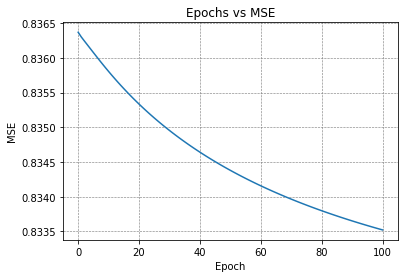

In [98]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec # Alignments 
epoch=np.array(list(range(101)))
plt.plot(epoch,mse)
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("Epochs vs MSE")
plt.grid(color='gray', linestyle='--', linewidth=0.6)
plt.show()

<br>

# <font color='red'> Task 2</font>

- For this task you have to consider the user_matrix U and the user_info.csv file.
- You have to consider is_male columns as  output features and rest as input features. Now you have to fit a model by posing this problem as binary classification task.
- You can apply any model like Logistic regression or Decision tree and check the performance of the model. 
- Do plot confusion matrix after fitting your model and write your observations how your model is performing in this task.

- Optional work- You can try scaling your U matrix.Scaling means changing the values of n_componenets while performing svd
  and then check your results.

In [134]:
path_dir_2 = '/content/drive/MyDrive/Colab Notebooks/AAIC_Assignments/solving/15_RecommendationSystem_Truncated SVD SGD algorithm to predict ratings/user_info.csv.txt'
data_2=pd.read_csv(path_dir_2)
data_2.head()

,user_id,age,is_male,orig_user_id
0,0,24,1,1
1,1,53,0,2
2,2,23,1,3
3,3,24,1,4
4,4,33,0,5


In [136]:
#Taking Left Singular vectors as column data
df_2 = pd.DataFrame(data = U1,)
X=df_2     

In [139]:
#  X

,0,1
0,0.066226,0.007888
1,0.013644,-0.048895
2,0.005438,-0.025128
3,0.005704,-0.018211
4,0.034122,0.009005
...,...,...
938,0.010350,-0.038006
939,0.031624,-0.007730
940,0.007389,-0.025974
941,0.024999,0.004478


In [140]:
df_2['is_male']=data_2['is_male']
df_2.head(5)

,0,1,is_male
0,0.066226,0.007888,1
1,0.013644,-0.048895,0
2,0.005438,-0.025128,1
3,0.005704,-0.018211,1
4,0.034122,0.009005,0


In [141]:
X=X.drop('is_male',axis='columns') #Independent variable
#consider is_male columns as output features 
y=df_2['is_male'] #dependent variable

In [143]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=54)

In [148]:
#using Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier = classifier.fit(X_train, y_train)
y_pred_lg_reg=classifier.predict(X_test)

from sklearn import metrics
conf_mat = metrics.confusion_matrix(y_test,y_pred_lg_reg)
print('-'*20)
print('Confusion Matrix:\n %s'%conf_mat)
print('-'*20)


--------------------
Confusion Matrix:
 [[  0  82]
 [  0 201]]
--------------------


In [149]:
#using Decision tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf = classifier.fit(X_train, y_train)
y_pred_dt=classifier.predict(X_test)

from sklearn import metrics
conf_mat = metrics.confusion_matrix(y_test,y_pred_dt)
print('-'*20)
print('Confusion Matrix:\n %s'%conf_mat)
print('-'*20)

--------------------
Confusion Matrix:
 [[  0  82]
 [  0 201]]
--------------------


Text(33.0, 0.5, 'True Labels')

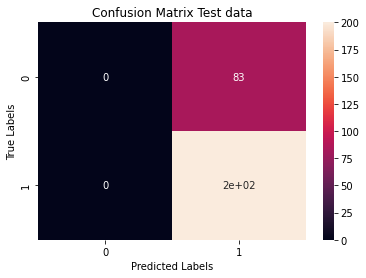

In [127]:
import seaborn as sns
categories = ['0', '1']
sns.heatmap(conf_mat, annot=True)
plt.title('Confusion Matrix Test data')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
